In [5]:
import pandas as pd
data = pd.read_csv('C:\\Users\\rdnc2\\Downloads\\Mall_Customers.csv')
import warnings
warnings.filterwarnings('ignore')

In [6]:
data.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
data.shape

(200, 5)

In [9]:
print('no of rows',data.shape[0])
print('no of rows',data.shape[1])

no of rows 200
no of rows 5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
X=data[[ 'Annual Income (k$)','Spending Score (1-100)']]


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(X)


KMeans()

In [16]:
kmeans = KMeans(n_clusters=5)
kmeans.fit_predict(X)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [17]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [18]:
wcss

[269981.28,
 183653.32894736837,
 106348.37306211118,
 73880.64496247197,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518779,
 24766.47160979344,
 23103.122085983916]

Text(0, 0.5, 'WCSS')

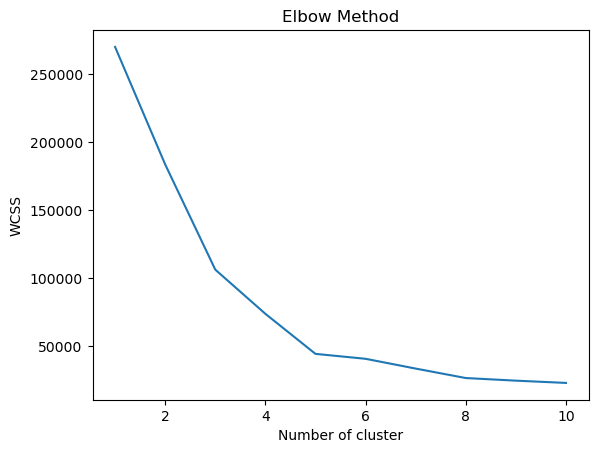

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')

In [20]:
kmeans=KMeans(n_clusters=5,random_state=42)
ymeans=kmeans.fit_predict(X)

In [21]:
ymeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

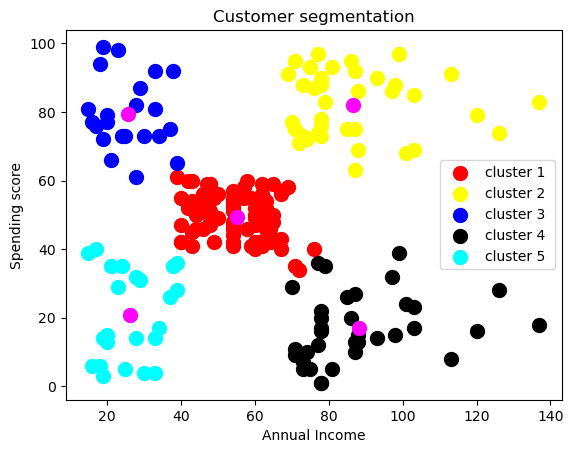

In [22]:
plt.scatter(X.iloc[ymeans==0,0],X.iloc[ymeans==0,1],s=100,c='red',label='cluster 1 ')
plt.scatter(X.iloc[ymeans==1,0],X.iloc[ymeans==1,1],s=100,c='yellow',label='cluster 2 ')
plt.scatter(X.iloc[ymeans==2,0],X.iloc[ymeans==2,1],s=100,c='blue',label='cluster 3 ')
plt.scatter(X.iloc[ymeans==3,0],X.iloc[ymeans==3,1],s=100,c='black',label='cluster 4 ')
plt.scatter(X.iloc[ymeans==4,0],X.iloc[ymeans==4,1],s=100,c='cyan',label='cluster 5 ')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta')
plt.title('Customer segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show

In [23]:
kmeans.predict([[15,39]])

array([4])

In [24]:
import joblib
joblib.dump(kmeans,"customer_segmentation")

['customer_segmentation']

In [25]:
model = joblib.load('customer_segmentation')
model.predict([[15, 39]])

array([4])

In [31]:
import tkinter as tk
from tkinter import Label, Entry, Button
import joblib

def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    model = joblib.load('customer_segmentation')
    result = model.predict([[p1, p2]])
    print('Customer belongs to cluster no:-', result[0])
    
    if result[0] == 0:
        Label(master, text='Customer with medium annual income and medium expenditure').grid(row=4, columnspan=2)
    elif result[0] == 1:
        Label(master, text='Customer with high annual income and low expenditure').grid(row=4, columnspan=2)
    elif result[0] == 2:
        Label(master, text='Customer with low annual income and low expenditure').grid(row=4, columnspan=2)
    elif result[0] == 3:
        Label(master, text='Customer with low annual income and high expenditure').grid(row=4, columnspan=2)
    elif result[0] == 4:
        Label(master, text='Customer with high annual income and high expenditure').grid(row=4, columnspan=2)

master = tk.Tk()
master.title('Customer Segmentation using Machine Learning')

label = Label(master, text='Customer Segmentation using Machine Learning', bg='black', fg='white')
label.grid(row=0, columnspan=2)

Label(master, text='Annual Income').grid(row=1)
Label(master, text='Spending Score').grid(row=2)

e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=3, columnspan=2)

master.mainloop()


Customer belongs to cluster no:- 3
Customer belongs to cluster no:- 3
Customer belongs to cluster no:- 3
Customer belongs to cluster no:- 3
Customer belongs to cluster no:- 3
Customer belongs to cluster no:- 3
Customer belongs to cluster no:- 3
Customer belongs to cluster no:- 3
Customer belongs to cluster no:- 3
